# Editing Features

The ArcGIS API for Python makes programmatic editing of features a breeze. The `edit_features()` method on `FeatureLayer` object can be used for the same. In the example below, we see how to add, update and delete features from a point feature layer

In [8]:
#connect to GIS
from arcgis.gis import GIS
from IPython.display import display
gis = GIS("https://usandiego.maps.arcgis.com", client_id="R8Euu5jhtUJw4ZdA")

Please sign in to your GIS and paste the code that is obtained below.
If a web browser does not automatically open, please navigate to the URL below yourself instead.
Opening web browser to navigate to: https://usandiego.maps.arcgis.com/sharing/rest/oauth2/authorize?response_type=code&client_id=R8Euu5jhtUJw4ZdA&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&state=ofRjCjwI8jpvQbLOvxm7Pn40KUqpy7


/Users/ndelafuente/local/src/TijuanaSeniorCapstone/venv/lib/python3.10/site-packages/urllib3/connectionpool.py:1043: InsecureRequestWarning: Unverified HTTPS request is being made to host 'usandiego.maps.arcgis.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [9]:
gis.users.me

<User username:NDELAFUENTE@sandiego.edu_usandiego>

<Item title:"MyFirstPointLayer" type:Feature Layer Collection owner:NDELAFUENTE@sandiego.edu_usandiego>
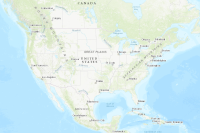

In [10]:
item = gis.content.get("311f5902f6b640b992ea51f2d23f5c8e")
item

In [12]:
item.layers

[<FeatureLayer url:"https://services1.arcgis.com/gFqWrLF7jCTW9q6S/arcgis/rest/services/MyFirstPointLayer/FeatureServer/0">]

In [15]:
feature_layer = item.layers[0]
feature_layer

<FeatureLayer url:"https://services1.arcgis.com/gFqWrLF7jCTW9q6S/arcgis/rest/services/MyFirstPointLayer/FeatureServer/0">

## Query the features
Let us query the features on this layer

In [16]:
feature_set = feature_layer.query() #an empty query string will return all 
                                        #the features or the first 1000 which ever is smaller
feature_set

<FeatureSet> 5 features

The `sdf` property of `FeatureSet` class is a powerful way to visualize all the features as a pandas dataframe table.

In [17]:
feature_set.sdf

,OBJECTID,NAME,APPROVED,SHAPE
0,2,John Doe,1,"{""x"": -118.37, ""y"": 34.086, ""spatialReference""..."
1,3,Kim Kardashian,0,"{""x"": -13044788.958999995, ""y"": 3857756.351200..."
2,4,Joe Smith,1,"{""x"": -118.15, ""y"": 33.8, ""spatialReference"": ..."
3,5,John Doe,0,"{""x"": -118.37, ""y"": 34.086, ""spatialReference""..."
4,6,Daniel Danielson,0,"{""x"": -13044788.958999995, ""y"": 3857756.351200..."


## Check if the layer can be edited
To enable a feature layer to be edited, the `edit` capability needs to be turned on. This can be verified by accessing the `capabilities` property on the `FeatureLayer` object:

In [18]:
feature_layer.properties.capabilities

'Create,Delete,Query,Update,Editing'

In [102]:
for f in feature_layer.properties.fields:
    print(f['name'])

OBJECTID
NAME
APPROVED


## Editing features

The feature layer does have all editing, updating and deleting capabilities turned on, thus it is ready for edit operations.

### Updating features
From the dataframe above, we notice the short_form field of San Francisco port has a typo. We can update this by calling the `edit_features()` method on the `ports_flayer` `FeatureLayer` object. The `edit_features()` method accepts a `Feature` object with correct parameters set.

In [103]:
feature_set.features

[{"geometry": {"x": -118.15, "y": 33.8, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}, "attributes": {"OBJECTID": 1, "NAME": "Joe Smith", "APPROVED": 0, "SHAPE": {"x": -118.15, "y": 33.8, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}}},
 {"geometry": {"x": -118.37, "y": 34.086, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}, "attributes": {"OBJECTID": 2, "NAME": "John Doe", "APPROVED": 1, "SHAPE": {"x": -118.37, "y": 34.086, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}}}]

In [104]:
feature_list = feature_set.features

# feature with objectid 1

obj1_feature = [f for f in feature_list if f.attributes['OBJECTID']==1][0]
obj1_feature.attributes

{'OBJECTID': 1,
 'NAME': 'Joe Smith',
 'APPROVED': 0,
 'SHAPE': {'x': -118.15,
  'y': 33.8,
  'spatialReference': {'wkid': 102100, 'latestWkid': 3857}}}

In [105]:
# does the same as the cell above, but is slower because it queries the feature layer
# should only be used for larger queries, if at all
feature_layer.query(object_ids="1").features[0].attributes

{'OBJECTID': 1, 'NAME': 'Joe Smith', 'APPROVED': 0}

As we can see above, the `short_form` attribute should be changed to `SFO`. Let us edit that and store it as a new `Feature` object

In [106]:
obj1_edit = obj1_feature
obj1_edit.attributes['APPROVED'] = True

In [107]:
display(obj1_edit)

{"geometry": {"x": -118.15, "y": 33.8, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}, "attributes": {"OBJECTID": 1, "NAME": "Joe Smith", "APPROVED": true, "SHAPE": {"x": -118.15, "y": 33.8, "spatialReference": {"wkid": 102100, "latestWkid": 3857}}}}

Now let us send this feature object to the `edit_features()` method and edit the original feature layer

In [108]:
update_result = feature_layer.edit_features(updates=[obj1_edit])
update_result

{'addResults': [],
 'updateResults': [{'objectId': 1,
   'uniqueId': 1,
   'globalId': None,
   'success': True}],
 'deleteResults': []}

In [116]:
# Check the feature again to see the changes
feature_layer.query(object_ids="1").features[0].attributes

{'OBJECTID': 1, 'NAME': 'Joe Smith', 'APPROVED': 1}

### Adding features
From the data frame, we also notice that 'Los Angeles', an important port is missing. We can add this to the original layer by calling the `edit_features()` method and passing a dictionary representation of the feature

In [119]:
# construct a new Feature object in Los Angeles
new_feature = {
    "attributes": {
        "NAME": "Kim Kardashian",
        "APPROVED": False
    },
    "geometry": {
        "x": -13044788.958999995,
        "y": 3857756.351200014
    }
}

In [121]:
add_result = feature_layer.edit_features(adds = [new_feature])

In [122]:
add_result

{'addResults': [{'objectId': 3,
   'uniqueId': 3,
   'globalId': None,
   'success': True}],
 'updateResults': [],
 'deleteResults': []}

### Deleting features
From the data frame, we notice 'Joe Schmoe' is an approved user, when they are a known federal criminal. We can remove it by calling the `edit_features()` method and passing the object id of the feature we want to be remove to the `deletes` parameter.

In [129]:
feature_list = feature_layer.query().features

In [137]:
# find object id for Redlands
joeschmoe_feature = [f for f in feature_list if f.attributes['NAME'] == 'Joe Schmoe'][0]
joeschmoe_objid = joeschmoe_feature.get_value('OBJECTID')
joeschmoe_objid

1

In [138]:
type(joeschmoe_objid)

int

In [141]:
# pass the object id as a string to the delete parameter
delete_result = feature_layer.edit_features(deletes=str(joeschmoe_objid))
delete_result

{'addResults': [],
 'updateResults': [],
 'deleteResults': [{'objectId': 1,
   'uniqueId': 1,
   'globalId': None,
   'success': True}]}

## Check results of edit operations
We have successfully added, removed and edited features. Let us query the layer once again and display the resutls as a dataframe and verify them.

In [143]:
feature_set_edited = feature_layer.query()
feature_set_edited.sdf

,OBJECTID,NAME,APPROVED,SHAPE
0,2,John Doe,1,"{""x"": -118.37, ""y"": 34.086, ""spatialReference""..."
1,3,Kim Kardashian,0,"{""x"": -13044788.958999995, ""y"": 3857756.351200..."


Thus, we no longer see 'Redlands' which we deleted. We see a new objectid of 23 corresponding to Los Angeles that we added. Also the short_form of San Francisco is corrected to 'SFO'.

The edits we performed on the features are persisted in the feature layer and will reflect in all clients accessing it.